In [1]:
import yfinance as yf
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

stock = "GOOG"
ticker = yf.Ticker(stock)
stock_data = ticker.history(start=start, end=end)
stock_data.columns = stock_data.columns.get_level_values(0)
if stock_data.empty:
    raise ValueError("Yahoo Finance did not return data. Try again later.")


stock_data.head
()


()

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
stock = 'GOOG'
googledata = yf.download(stock,start,end)
googledata.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2016-01-13,34.767242,36.463520,34.670468,36.270468,50034000
2016-01-14,35.469971,35.827537,34.198509,35.006448,44516000
2016-01-15,34.464012,35.073940,34.013393,34.356814,72162000
2016-01-19,34.828281,35.234733,34.412402,34.903220,45362000
2016-01-20,34.662529,35.079401,33.412403,34.174191,68900000


In [4]:
googledata.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,101.117312,102.179740,100.007892,101.049709,2.891934e+07
std,58.383291,59.064723,57.675690,58.355392,1.383318e+07
min,33.164257,33.364757,32.906198,33.143917,6.138200e+06
25%,53.931754,54.539818,53.277290,53.917606,2.014158e+07
50%,88.019836,88.828761,86.925542,87.984359,2.559160e+07
75%,137.591789,138.804581,136.296880,137.679893,3.334550e+07
max,332.730011,334.440002,326.250000,329.265015,1.269620e+08


In [5]:
googledata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2016-01-13 to 2026-01-12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   2514 non-null   float64
 1   (High, GOOG)    2514 non-null   float64
 2   (Low, GOOG)     2514 non-null   float64
 3   (Open, GOOG)    2514 non-null   float64
 4   (Volume, GOOG)  2514 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.8 KB


In [6]:
googledata.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [7]:
Closing_price = googledata[['Close']]
Closing_price

Price,Close
Ticker,GOOG
Date,
2016-01-13,34.767242
2016-01-14,35.469971
2016-01-15,34.464012
2016-01-19,34.828281
2016-01-20,34.662529
...,...
2026-01-06,314.549988
2026-01-07,322.429993


Text(0.5, 1.0, 'Close price of Google')

<Figure size 1500x500 with 0 Axes>

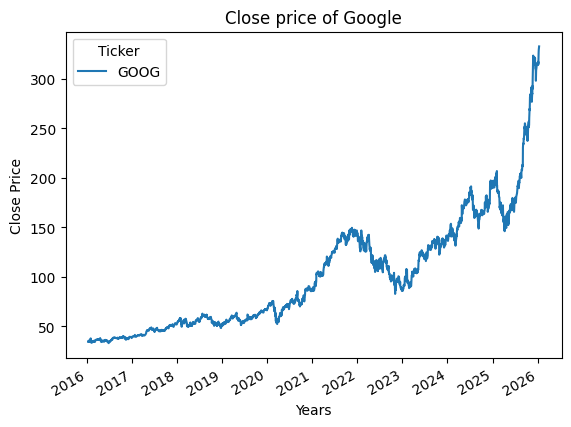

In [8]:
plt.figure(figsize=(15,5))
Closing_price['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Google')

<Figure size 1500x500 with 0 Axes>

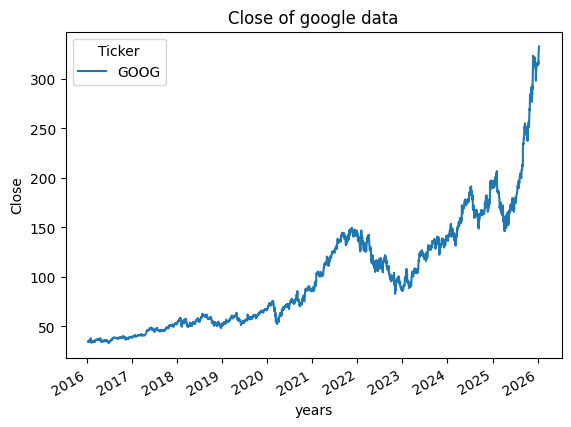

<Figure size 1500x500 with 0 Axes>

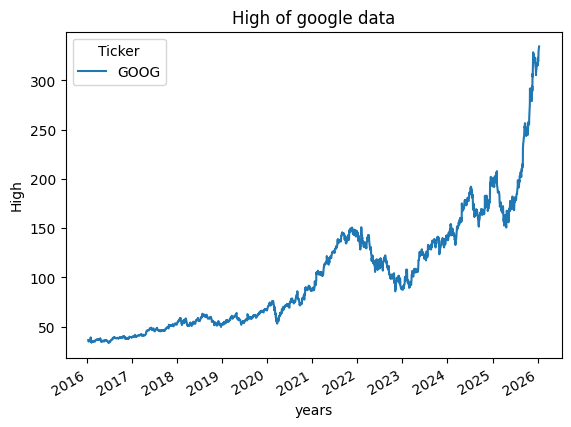

<Figure size 1500x500 with 0 Axes>

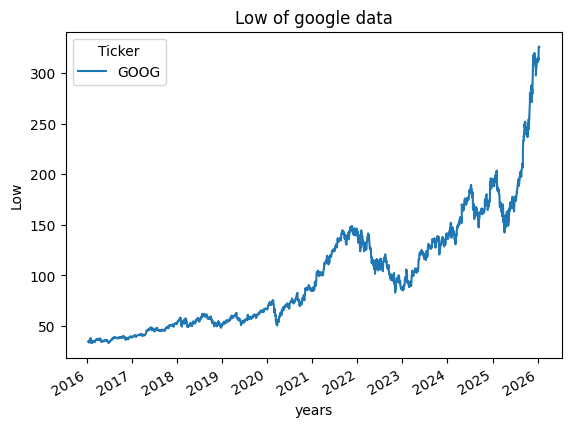

<Figure size 1500x500 with 0 Axes>

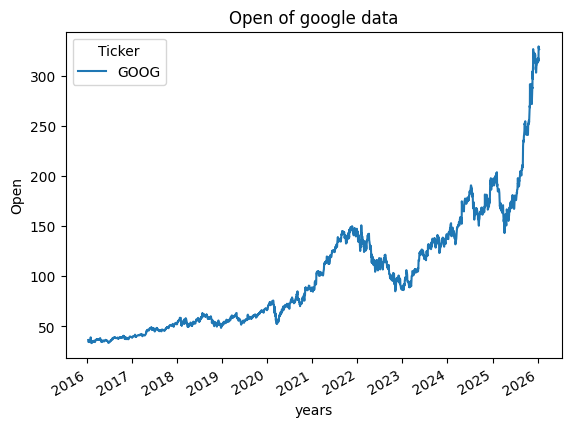

<Figure size 1500x500 with 0 Axes>

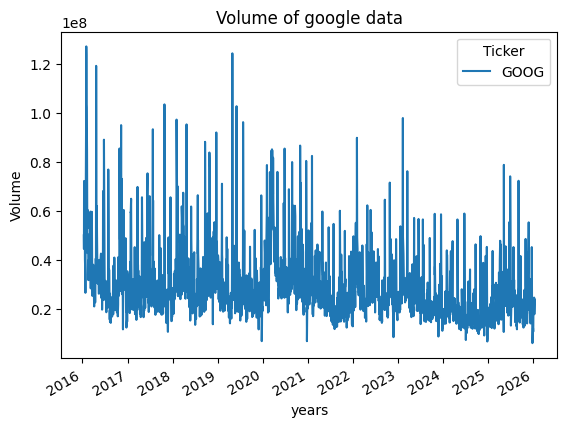

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_graph(figgsize,values,column_name):
    plt.figure(figsize=figgsize)
    values.plot()
    plt.xlabel('years')
    plt.ylabel(column_name)
    plt.title(f"{column_name} of google data")

for column in googledata.columns:
    plot_graph((15,5),googledata[column[0]],column[0])

In [10]:
Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()

C:\Users\user\AppData\Local\Temp\ipykernel_8136\3333718346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()


In [11]:
Closing_price['MA_for_365_days'][0:365].tail()

Date
2017-06-19          NaN
2017-06-20          NaN
2017-06-21          NaN
2017-06-22          NaN
2017-06-23    38.906729
Name: MA_for_365_days, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_8136\3523420466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()


Text(0.5, 1.0, 'Close price of Google')

<Figure size 640x480 with 0 Axes>

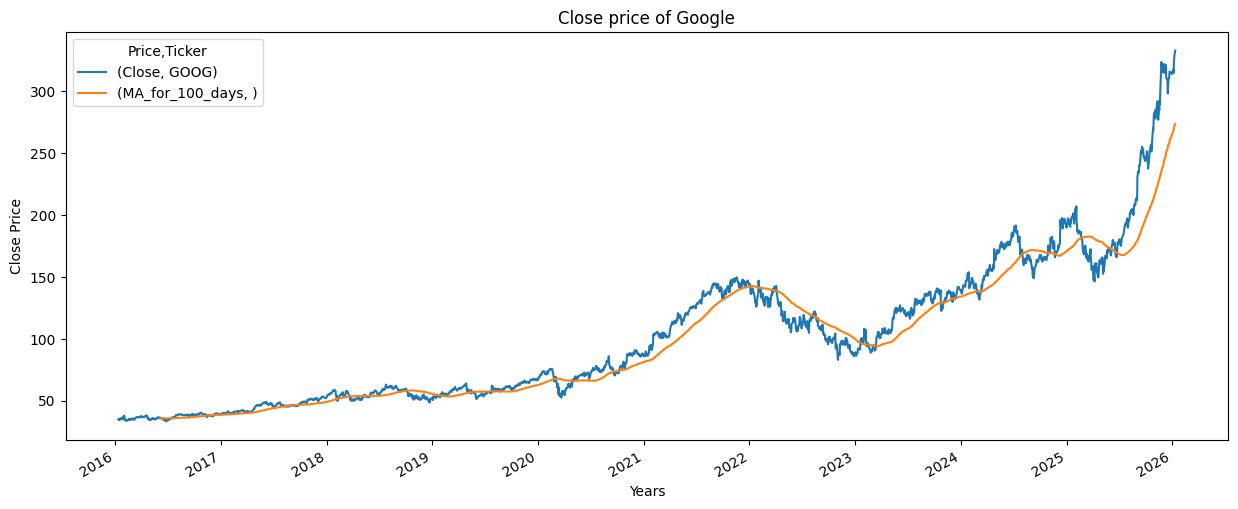

In [12]:
Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()
Closing_price['MA_for_100_days'].head()
plt.figure()
Closing_price[['Close','MA_for_100_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Google')

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Closing_price[['Close']].values)
scaled_data

array([[0.00535103],
       [0.00769685],
       [0.0043388 ],
       ...,
       [0.97756753],
       [0.988016  ],
       [1.        ]])

In [14]:
scaled_data.shape

(2514, 1)

In [15]:
x_data = []
y_data = []

base_days = 100

for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [16]:
x_data[0], y_data[0]

(array([[0.00535103],
        [0.00769685],
        [0.0043388 ],
        [0.00555479],
        [0.00500148],
        [0.00634999],
        [0.00944132],
        [0.00719155],
        [0.00741852],
        [0.00525659],
        [0.01038726],
        [0.01237359],
        [0.01387287],
        [0.01596851],
        [0.00972294],
        [0.00658523],
        [0.00253636],
        [0.00239886],
        [0.00163182],
        [0.00262748],
        [0.00246015],
        [0.00234254],
        [0.00376727],
        [0.00664984],
        [0.00481923],
        [0.00540901],
        [0.00632847],
        [0.00457074],
        [0.00518535],
        [0.00621084],
        [0.00609816],
        [0.00488882],
        [0.00837442],
        [0.00838104],
        [0.00731581],
        [0.00706236],
        [0.00445642],
        [0.00425929],
        [0.00612635],
        [0.00738208],
        [0.00970142],
        [0.0103094 ],
        [0.00995156],
        [0.01123712],
        [0.01151711],
        [0

In [17]:
len_train = int(len(x_data)*0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2172, 100, 1)
(2172, 1)
(242, 100, 1)
(242, 1)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(1))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x_train, y_train, batch_size = 5, epochs=10)

Epoch 1/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0020
Epoch 2/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - loss: 2.0021e-04
Epoch 3/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - loss: 1.5177e-04
Epoch 4/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 1.4133e-04
Epoch 5/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 9.7643e-05
Epoch 6/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 1.0543e-04
Epoch 7/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 1.1293e-04
Epoch 8/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 8.5068e-05
Epoch 9/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - loss: 7.9307e-05
Epoch 10/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - loss: 9.0531e-05


In [23]:
predictions = model.predict(x_test)
predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


array([[0.5654304 ],
       [0.5400184 ],
       [0.5488797 ],
       [0.5510008 ],
       [0.5686152 ],
       [0.5790753 ],
       [0.56915337],
       [0.58421403],
       [0.538993  ],
       [0.5362117 ],
       [0.5186949 ],
       [0.52182204],
       [0.5196261 ],
       [0.51445955],
       [0.52170503],
       [0.51910824],
       [0.51506746],
       [0.5187216 ],
       [0.5174697 ],
       [0.5013775 ],
       [0.49882746],
       [0.4874907 ],
       [0.47860855],
       [0.46464354],
       [0.46986192],
       [0.46017015],
       [0.47091526],
       [0.47935742],
       [0.4770909 ],
       [0.4807431 ],
       [0.45723087],
       [0.44903713],
       [0.45818985],
       [0.44688296],
       [0.4540354 ],
       [0.45190442],
       [0.4395641 ],
       [0.44884765],
       [0.44655603],
       [0.44946778],
       [0.4607302 ],
       [0.47031587],
       [0.453507  ],
       [0.44186765],
       [0.4172907 ],
       [0.41567874],
       [0.42464763],
       [0.426

In [24]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[202.54784],
       [194.93527],
       [197.58981],
       [198.22522],
       [203.50189],
       [206.63538],
       [203.66312],
       [208.17477],
       [194.6281 ],
       [193.79492],
       [188.54747],
       [189.48427],
       [188.82643],
       [187.27872],
       [189.44922],
       [188.67131],
       [187.46083],
       [188.55548],
       [188.18045],
       [183.35979],
       [182.59587],
       [179.19978],
       [176.53899],
       [172.35555],
       [173.9188 ],
       [171.01547],
       [174.23434],
       [176.76332],
       [176.08435],
       [177.17842],
       [170.13496],
       [167.6804 ],
       [170.42224],
       [167.03508],
       [169.1777 ],
       [168.53934],
       [164.8426 ],
       [167.62364],
       [166.93715],
       [167.8094 ],
       [171.18324],
       [174.05478],
       [169.01942],
       [165.53267],
       [158.17026],
       [157.68736],
       [160.37415],
       [160.80234],
       [155.21622],
       [150.128  ],


In [25]:
inv_y_test = scaler.inverse_transform(y_test)

In [26]:
inv_predictions[:5], inv_y_test[:5]

(array([[202.54784],
        [194.93527],
        [197.58981],
        [198.22522],
        [203.50189]], dtype=float32),
 array([[193.01855469],
        [196.30575562],
        [196.41532898],
        [201.84422302],
        [204.80270386]]))

In [27]:
plotting_data = pd.DataFrame({
  'original_test_data': inv_y_test.reshape(-1),
'predictions': inv_predictions.reshape(-1),
},
index = Closing_price.index[len_train+100:]
)

plotting_data.tail()

,original_test_data,predictions
Date,,
2026-01-06,314.549988,318.514618
2026-01-07,322.429993,314.955719
2026-01-08,326.010010,324.343964
2026-01-09,329.140015,327.506622
2026-01-12,332.730011,330.170624


Text(0.5, 1.0, 'Close price of Google')

<Figure size 640x480 with 0 Axes>

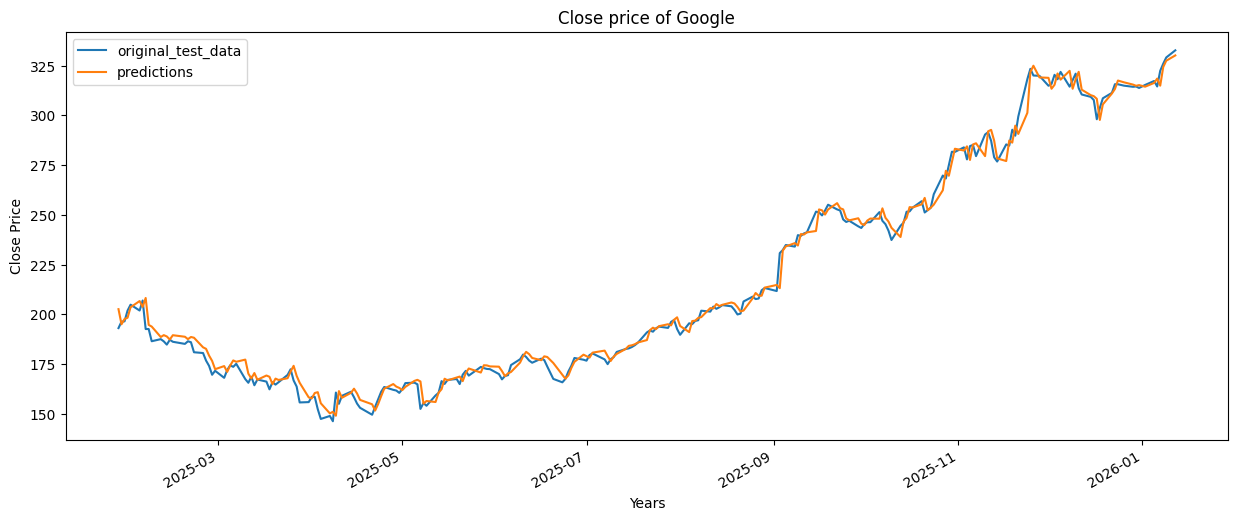

In [28]:
plt.figure()
plotting_data.plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Google')

In [29]:
last_100 = Closing_price[['Close']].tail(100)
last_100.tail()

Price,Close
Ticker,GOOG
Date,
2026-01-06,314.549988
2026-01-07,322.429993
2026-01-08,326.010010
2026-01-09,329.140015
2026-01-12,332.730011


In [30]:
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100

array([[[0.        ],
        [0.00323164],
        [0.04907755],
        [0.06741578],
        [0.05832178],
        [0.06027598],
        [0.09154112],
        [0.10025953],
        [0.08868541],
        [0.23231049],
        [0.24403497],
        [0.26289936],
        [0.25688149],
        [0.30036109],
        [0.29750251],
        [0.30667989],
        [0.31119346],
        [0.3892761 ],
        [0.38671856],
        [0.3749084 ],
        [0.39356398],
        [0.41545419],
        [0.39770128],
        [0.3936391 ],
        [0.35971303],
        [0.35023484],
        [0.35482342],
        [0.33361018],
        [0.32751708],
        [0.34248663],
        [0.34918159],
        [0.34933205],
        [0.38739553],
        [0.35444737],
        [0.34188489],
        [0.31743703],
        [0.28193121],
        [0.33571645],
        [0.34737625],
        [0.38890006],
        [0.39017888],
        [0.40454658],
        [0.4288441 ],
        [0.3861167 ],
        [0.39506839],
        [0

In [31]:
last_100.shape

(1, 100, 1)

In [32]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[1.004079]], dtype=float32)

In [33]:
scaler.inverse_transform(day101)

array([[333.27188]], dtype=float32)

In [34]:
def predict_future(no_of_days, prev_100):

    future_predictions = []
    for i in range(no_of_days):
        next_day = model.predict(prev_100).tolist()
        # Convert prev_100[0] to a list before appending
        prev_100_list = prev_100[0].tolist()
        prev_100_list.append(next_day[0])
        # Convert back to a NumPy array with the correct shape
        prev_100 = np.array([prev_100_list[1:]])
        prev_100 = prev_100.reshape(1, -1, 1) # Reshape for LSTM input

        future_predictions.append(scaler.inverse_transform(next_day))

    return future_predictions

In [35]:
no_of_days = 10
future_results = predict_future(no_of_days, last_100)
print(future_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[array([[333.27190071]]), array([[333.1140706]]), array([[332.61628652]]), array([[332.03946069]]), array([[331.51822223]]), array([[331.10911663]]), array([[330.82140054]]), array([[330.64089205]]), array([[330.54568086]]), array([[330.51480691]])]


Text(0.5, 1.0, 'Future Close price of Google')

<Figure size 640x480 with 0 Axes>

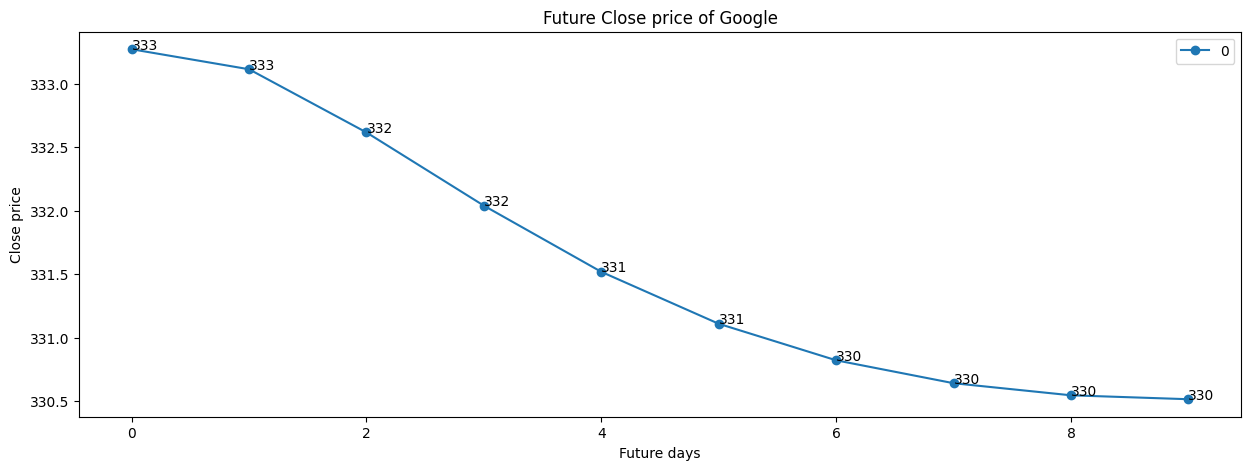

In [36]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i,future_results[i],int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close price')
plt.title("Future Close price of Google")

In [37]:
model.save("Latest_google_model.keras")